# COGS 108 - Final Project 

# Overview

Include 3-4 sentences summarizing your project and results.

This project is analyzing various socioeconomic factors relating to restaurant health inspections. If a pattern in health inspection scores can be found, then the health inspection system can be more efficient because poor scoring restaurants can be focused on and resources can be delegated more efficiently. 

# Name & PID

- Name: Beverly Peng
- PID: A14566574

# Research Question

What combination of socioeconomic factors can best predict the health inspection score of a restaurant?

## Background and Prior Work

Health inspections are vital in improving the consumer and worker's safety in the restaurent industry. There have been many studies adding to the pool of information about how to make the restaurant health inspection process more efficient. There was a study conducted in Philadelphia about the effects of inspection frequency, sociodemographic factors, and food safety violations have on the likelihood of violation frequency in chain and nonchain restaurants (1). These researchers found that chain restaurants had an average of 6.5 total violations per inspection, while nonchains had 9.6 (1). When the number of nonchain inspections increased from 1 to more than 2, there was an average of 1.6 fewer violations; however, this was not seen in chain restaurants (1). For nonchain restaurants in neighborhoods with a high proportion of black residents, there were lower foodborn-illness risk factor violations but more good retail practice violations per inspection (1). This data could be used to make the food safety inspections more efficient by centering the focus on nonchain restaurants and discovering additional factors to determine where would benefit the most from these inspections. 

Social media continues to have a large impact on how we decide which restaurants to eat at. There are many websites designed for users to post their reviews and rate the experience on a scale of 1-5. There was a study from 2013 that found posting restaurant inspection scores online may be a tool for improving food safety (2). Critical violations decreased significantly along with temperature holding violations, hygiene practive violations, and equipment cleanliness violations one these inspection scores were public (2). Another study looked at Yelp reviews and built a predictitive model based on select restaurants as a way to predict the chance of those restaurants receiving serious health code violations (3). The researchers found a list of positive and negative key words correlating to the overall restaurant health code rating. There were 3 measurements per keyword: foodborne illness symptoms, physical environment, and positive sentiment. These measurements allowed the algorithm to predict which health violation would be the most likely given a type of review. This model takes into consideration useful reviews versus less meaningful ones via the unknown ranking Yelp algorithm. This study found that utilizing the number of stars a restaurant received and various keywords usage (I love, Affordable, Microwave, Vomit, and Dirty) were able to significantly predict low health code ratings (3). The keywords listed above were significant in San Francisco, while the New York City model used "recommend" and "I found a". This indicates that different cities have different key words to analyze, so location must also be incorporated into future analysis. 

Internet reviews of restaurants have provided consumers with valuable information about the quality of restaurants. With increasing amounts of this information being available to the public, data analytics is a rapidly growing and evolving field that can use this newfound information and use it to make 

References (include links):
- 1)
Title: Inspection Frequency, Sociodemographic Factors, and Food Safety Violations in Chain and Nonchain Restaurants, Philadelphia, Pennsylvania, 2013-2014
Publication Date: 2017 Jan 6
Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5349477/
- 2)
Title: Impact of internet posting of restaurant inspection scores on critical violations.
Publication Date: 2013 Jun
Source: https://www.ncbi.nlm.nih.gov/pubmed/23858661
- 3) 
Title: Supplementing Public Health Inspection via Social Media
Publication Date: 2016 Mar 29
Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4811425/

# Hypothesis


I think percent of families below the poverty line will be the best predictor of a restaurant's inspection score. 

# Dataset(s)

The following datasets were retrieved from a zipped Canvas folder. 

- Dataset Name: inspections.csv
- Link to the dataset: data/inspections.csv
- Number of observations: 18466
- This file contains information about restaurant inspections in North Carolina from September 2012 to November 2016. The data included in this project were date of inspection, address, restaurant open date, how many days from the open date the inspection took place, zipcode, and score. 


- Dataset Name: yelp.csv
- Link to the dataset: data/yelp.csv
- Number of observations: 3688
- This dataset has generalized information about yelp reviews of various restaurants including rating, address, and zipcode. 


- Dataset Name: zipcodes.csv
- Link to the dataset: data/zipcodes.csv
- Number of observations: 38
- This dataset contains averages of various economic statuses of zipcodes. The factors used in this analysis were zipcode, median family income, median household income, per capita income, percent families below the poverty line, percent of SNAP benefits, percent supplemental security income, and percent of nonwhite people. 

I combined these three datasets by adding elements from yelp.csv and zipcodes.csv to inspections.csv. I only included data between inspections and averaged yelp ratings with the same addresses and added the zipcodes data to the remaining inspection information. 

# Setup

In [1]:
## Import packages

import pandas as pd
import numpy as np
from statistics import mean 

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 7) #increase figure size

import seaborn as sns
sns.set(style='white', font_scale=2) #set style

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import uniform, norm, bernoulli, poisson
from scipy.stats import skewnorm

# Statmodels & patsy
import patsy
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

# Data Cleaning

The files zipcodes.csv, yelp.csv, and inspections.csv were used for this project's data analysis. Here is the overall cleaning workflow: 

For zipcodes.csv, no data was filtered out due to outliers. The resulting df is (38, 8). 
yelp.csv starts with (3688, 31). NaN addresses were removed (3632, 31). There were around 1,300 yelp entries with NaN prices values, but these were not removed because this analysis does not rely on prices. 
inspections.csv started with (18466, 36). The non-Restaurant inspection data was removed (11985, 36). 

The data with different zipcodes than the zipcodes.csv file were removed leaving the yelp dataframe with (3243, 31) and inspections dataframe with (11869, 36). The common addresses between inspection and yelp data were used for the final data analysis. Yelp: (1403, 31). Inspections: (8495, 36). Extra columns from the inspection data was removed, leaving date, address, restaurant open date, days from open data, zipcode, and score. More differences in zip codes were removed from the inspection data (8461, 6) and zipcodes (32, 8). 

After plotting the ratings, the averaged values skewed the data, so the ratings were put into 0.5 bins. 


What methods did you use to analyze your data? Briefly explain what steps you had to take before you were able to use the datasets you chose to answer your question of interest.

How 'clean' is the data?
What did you have to do to get the data into a usable format? (If you did nothing, how did you determine there was nothing to do?)
What pre-processing steps that were required for your methods (for example, checking data distributions and performing any transformations that may be required)

In [2]:
# Cleaning zipcode data

print("ZIPCODES.csv")
df_zipcodes_raw = pd.read_csv("data/zipcodes.csv")
print(df_zipcodes_raw.shape)

#df_zipcodes_raw["zip"].sort_values()
#df_zipcodes_raw["median_family_income_dollars"].sort_values()
#df_zipcodes_raw["median_household_income_dollars"].sort_values()
#df_zipcodes_raw["per_capita_income_dollars"].sort_values()
#df_zipcodes_raw["percent_damilies_below_poverty_line"].sort_values()
#df_zipcodes_raw["percent_nonwhipercent_snap_benefitste"].sort_values()
#df_zipcodes_raw["percent_supplemental_security_income"].sort_values()
#df_zipcodes_raw["percent_nonwhite"].sort_values()

df_zipcodes = df_zipcodes_raw
df_zipcodes.head()

ZIPCODES.csv
(38, 8)


,zip,median_family_income_dollars,median_household_income_dollars,per_capita_income_dollars,percent_damilies_below_poverty_line,percent_snap_benefits,percent_supplemental_security_income,percent_nonwhite
0,27501,59408,51121,21631,10.5,15.5,5.2,17.9
1,27502,109891,95857,36763,3.4,2.4,0.8,18.9
2,27511,82292,67392,33139,9.6,4.5,2.2,24.8
3,27513,109736,87262,41232,3.8,2.4,1.5,27.8
4,27518,125432,98247,49865,5.5,1.0,1.7,19.9


In [3]:
# Cleaning yelp data

print("YELP.csv")
df_yelp_raw = pd.read_csv("data/yelp.csv")
print(df_yelp_raw.shape)

df_yelp_raw["address1"].sort_values()
df_yelp = df_yelp_raw.dropna(subset=['address1'])
print("Removing null addresses")
print(df_yelp.shape)

#df_yelp["price"].sort_values().tolist()[2300:]

df_yelp.head()

YELP.csv
(3688, 31)
Removing null addresses
(3632, 31)


,id,name,is_closed,rating,review_count,address1,zip_code,latitude,longitude,price,...,italian,newamerican,chicken_wings,delis,bars,salad,seafood,bbq,bakeries,sushi
0,42nd-street-oyster-bar-rdu-airport-morrisville,42nd street oyster bar - rdu airport,False,2.5,23,2400 John Brantley Blvd,27560,35.873808,-78.790896,$$,...,False,True,False,False,False,False,True,False,False,False
1,aldi-foods-cary,aldi foods,False,4.0,17,2303 NW Maynard Rd,27519,35.802840,-78.785930,$,...,False,False,False,False,False,False,False,False,False,False
2,luciano-pizzeria-ristorante-northwest-raleigh,luciano pizzeria ristorante,False,5.0,2,Crabtree Valley Mall,27612,35.839681,-78.678791,$,...,True,False,False,False,False,False,False,False,False,False
3,olive-garden-italian-restaurant-wilson,olive garden italian restaurant,False,3.0,16,3401 Raleigh Rd Pkwy W,27893,35.743170,-77.964160,$$,...,True,False,False,False,False,True,False,False,False,False
4,subway-wilson-4,subway,False,3.5,3,4934 Raleigh Rd,27896,35.762936,-77.999428,$,...,False,False,False,False,False,False,False,False,False,False


In [4]:
# CLeaning inspections data

print("INSPECTIONS.csv")
df_inspections_raw = pd.read_csv("data/inspections.csv")
print(df_inspections_raw.shape)

#f_dinspections_raw["city"].isnull().value_counts()

df_inspections = df_inspections_raw
df_inspections = df_inspections.drop(df_inspections[df_inspections['facilitytype'] != "Restaurant" ].index)
print("Removing non-Restaurants")
print(df_inspections.shape)

df_inspections.head()

INSPECTIONS.csv
(18466, 36)
Removing non-Restaurants
(11985, 36)


,hsisid,date,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,...,num_non_critical,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous,avg_neighbor_num_critical,avg_neighbor_num_non_critical,top_match,second_match,critical
0,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,(919) 350-8047,2002-12-21T00:00:00Z,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,4092014046,2012-09-21T00:00:00Z,Overtime Sports Pub,1030-149 N Rogers Ln,NaN,raleigh,NC,27610,(919) 255-9556,2004-05-04T00:00:00Z,...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4092015191,2012-09-21T00:00:00Z,TASTE OF CHINA,6209 ROCK QUARRY RD,STE 126,raleigh,NC,27610,(919) 773-2285,2008-08-04T00:00:00Z,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4092016122,2012-09-21T00:00:00Z,Panera Bread #1643,1065 Darrington DR,NaN,cary,NC,27513,NaN,2012-03-28T00:00:00Z,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,4092013134,2012-09-24T00:00:00Z,Pearl Chinese Restaurant,3215 AVENT FERRY RD,NaN,raleigh,NC,27606-2720,(919) 233-8776,2000-04-14T00:00:00Z,...,7,NaN,NaN,NaN,NaN,3.0,6.4,4.092014e+09,4.092016e+09,1


In [5]:
# Removing uncommon zipcodes between zipcodes, yelp, and inspections

zip_zipcodes = df_zipcodes["zip"]
#print(len(zip_zipcodes))
zip_yelp = df_yelp_raw["zip_code"]
#print(len(zip_yelp))
zip_common = set(zip_zipcodes).intersection(zip_yelp)
#print(len(zip_common))

print("DF_YELP")
df_yelp = df_yelp_raw[df_yelp_raw["zip_code"].isin(zip_common)]
print(df_yelp.shape)

print("DF_ZIPCODES")
df_zipcodes = df_zipcodes_raw[df_zipcodes_raw["zip"].isin(zip_common)]
print(df_zipcodes.shape)

# Removing uncommon zipcodes from inspections

print("DF_INSPECTIONS")
df_inspections = df_inspections[df_inspections["zip"].isin(zip_common)]
print(df_inspections.shape)


DF_YELP
(3243, 31)
DF_ZIPCODES
(38, 8)
DF_INSPECTIONS
(11869, 36)


In [6]:
# Helper function to clean strings

def clean(string): 
    if isinstance(string, float): 
        return ""
    string = string.lower()
    string = string.strip()
    return string

In [7]:
# Getting similar addresses between yelp and inspections

new_address_yelp = []
for value in df_yelp["address1"].tolist(): 
    if isinstance(value, float): 
        name = ""
    else: 
        name = value
    name = name.lower()
    name = name.strip()
    new_address_yelp.append(name)
#new_address_yelp

new_address_inspections = []
for value in df_inspections_raw["address1"].tolist(): 
    if isinstance(value, float): 
        name = ""
    else: 
        name = value
    name = clean(name)
    new_address_inspections.append(name)
#new_address_inspections

new_address = set(new_address_yelp).intersection(new_address_inspections)
#print(len(new_address))

df_yelp["address1"] = df_yelp["address1"].apply(clean)

print("DF_YELP")
df_yelp = df_yelp[df_yelp["address1"].isin(new_address)]
print(df_yelp.shape)

print("DF_INSPECTIONS")
df_inspections = df_inspections_raw
df_inspections["address1"] = df_inspections["address1"].apply(clean)
df_inspections = df_inspections[df_inspections["address1"].isin(new_address)]
print(df_inspections.shape)

# At this point, df_inspections and df_yelp have the same 

DF_YELP
(1403, 31)
DF_INSPECTIONS
(8495, 36)


In [8]:
# Cleaning inspections

# Removing unwanted inspection columns
df_inspections = df_inspections[["date", "address1", "restaurantopendate", "days_from_open_date", "zip", "score"]]
df_inspections["date"] = df_inspections['date'].astype(str).str[0:10]
df_inspections["restaurantopendate"] = df_inspections['restaurantopendate'].astype(str).str[0:10]

# No null values
null_rows = df_inspections.isnull().any(axis=1).sum()
null_rows

df_inspections.head()


,date,address1,restaurantopendate,days_from_open_date,zip,score
2,2012-09-21,6209 rock quarry rd,2008-08-04,1509,27610,97.0
3,2012-09-21,1065 darrington dr,2012-03-28,177,27513,99.0
4,2012-09-21,841 e gannon ave,2008-02-25,1670,27597,97.0
6,2012-09-24,3215 avent ferry rd,2000-04-14,4546,27606,96.0
7,2012-09-24,1321 5th ave,2001-02-19,4235,27529,95.5


In [9]:
# Cleaning yelp

df_yelp = df_yelp[["rating", "zip_code", "address1"]]
df_yelp.head()
print("DF_YELP")
print(df_yelp.shape)
#print(df_yelp["address1"].value_counts())

# Checking addresses and zipcodes match
# {address:zip_code}
dictionary = {}
for index, row in df_yelp.iterrows(): 
    if row[1] in dictionary: 
        dictionary[row[2]].append(row[1])
    else: 
        dictionary[row[2]] = [row[1]]
dictionary
for value in dictionary: 
    if len(dictionary[value]) != 1:
        print("need to fix something")

# Getting average scores for yelp scores
# {address:list of scores}
dict_yelp_list = {}
dict_yelp = {}
for index, row in df_yelp.iterrows():
    if row[2] in dict_yelp_list: 
        dict_yelp_list[row[2]].append(row[0])
    else: 
        dict_yelp_list[row[2]] = [row[0]]

for value in dict_yelp_list: 
    if value in dict_yelp: 
        continue
    else: 
        dict_yelp[value] = mean(dict_yelp_list[value])


DF_YELP
(1403, 3)


In [10]:
# Combining address ratings
df_yelp_avg = pd.DataFrame(columns = ["address", "zip_code", "rating"])
index = 0
check = []
check2 = []
for index, row in df_yelp.iterrows(): 
    if row[2] not in df_yelp_avg["address"].tolist():  
        df_yelp_avg.loc[index] = [row[2], row[1], dict_yelp[row[2]]]
        index = index + 1
        check2.append(row[2])
    else: 
        check.append(row[2])
print("DF_YELP_AVG")
print(df_yelp_avg.shape)
df_yelp_avg.head()


DF_YELP_AVG
(1106, 3)


,address,zip_code,rating
50,7713 lead mine rd,27615,4.214286
53,1025 blue ridge rd,27607,4.000000
60,3618 new bern ave,27610,3.000000
64,3801 rock quarry rd,27610,3.000000
79,212 grande heights dr,27513,4.000000


In [11]:
# Removing more uncommon zipcodes

df = df_inspections

zip_remove = set(df["zip"].tolist()) - set(df_zipcodes["zip"].tolist())
zip_remove = list(zip_remove)
print(zip_remove)

print(df.shape)
df = df.drop(df[df['zip'] == zip_remove[0]].index)
df = df.drop(df[df['zip'] == zip_remove[1]].index)
df = df.drop(df[df['zip'] == zip_remove[2]].index)
df = df.drop(df[df['zip'] == zip_remove[3]].index)
df = df.drop(df[df['zip'] == zip_remove[4]].index)
df = df.drop(df[df['zip'] == zip_remove[5]].index)
print(df.shape)
#rows_remove

zip_remove = set(df_zipcodes["zip"].tolist()) - set(df["zip"].tolist())
zip_remove = list(zip_remove)
print(zip_remove)
print(df_zipcodes.shape)
df_zipcodes = df_zipcodes.drop(df_zipcodes[df_zipcodes['zip'] == zip_remove[0]].index)
df_zipcodes = df_zipcodes.drop(df_zipcodes[df_zipcodes['zip'] == zip_remove[1]].index)
df_zipcodes = df_zipcodes.drop(df_zipcodes[df_zipcodes['zip'] == zip_remove[2]].index)
df_zipcodes = df_zipcodes.drop(df_zipcodes[df_zipcodes['zip'] == zip_remove[3]].index)
df_zipcodes = df_zipcodes.drop(df_zipcodes[df_zipcodes['zip'] == zip_remove[4]].index)
df_zipcodes = df_zipcodes.drop(df_zipcodes[df_zipcodes['zip'] == zip_remove[5]].index)
print(df_zipcodes.shape)

zip_remove = set(df["zip"].tolist()) - set(df_zipcodes["zip"].tolist())
print(zip_remove)
zip_remove = set(df_zipcodes["zip"].tolist()) - set(df["zip"].tolist())
print(zip_remove)


[27652, 27595, 27628, 27695, 28145, 27512]
(8495, 6)
(8461, 6)
[27522, 27592, 27562, 27596, 27501, 27703]
(38, 8)
(32, 8)
set()
set()


In [12]:
# Combining inspections, yelp, and zipcodes to single dataframe

rating = []
family_income = []
household_income = []
per_capita_income = []
below_poverty_line = []
snap_benefits = []
percent_supplemental_security_income = []
nonwhite = []
for index, row in df.iterrows(): 
    # Matching address to yelp_avg
    i = df_yelp_avg.index[df_yelp_avg['address'] == row[1]]
    rating.append(df_yelp_avg.loc[i]["rating"].tolist()[0])
    # Matching zip to zipcode
    i = df_zipcodes.index[df_zipcodes["zip"] == row[4]]
    family_income.append(df_zipcodes.loc[i]["median_family_income_dollars"].tolist()[0])
    household_income.append(df_zipcodes.loc[i]["median_household_income_dollars"].tolist()[0])
    per_capita_income.append(df_zipcodes.loc[i]["per_capita_income_dollars"].tolist()[0])
    below_poverty_line.append(df_zipcodes.loc[i]["percent_damilies_below_poverty_line"].tolist()[0])
    snap_benefits.append(df_zipcodes.loc[i]["percent_snap_benefits"].tolist()[0])
    percent_supplemental_security_income.append(df_zipcodes.loc[i]["percent_supplemental_security_income"].tolist()[0])
    nonwhite.append(df_zipcodes.loc[i]["percent_nonwhite"].tolist()[0])
    
#print(df.shape)
#print(len(rating))
df["rating"] = rating
df["family_income"] = family_income
df["household_income"] = household_income
df["per_capita_income"] = per_capita_income
df["below_poverty_line"] = below_poverty_line
df["snap_benefits"] = snap_benefits
df["percent_supplemental_security_income"] = percent_supplemental_security_income
df["nonwhite"] = nonwhite
df


,date,address1,restaurantopendate,days_from_open_date,zip,score,rating,family_income,household_income,per_capita_income,below_poverty_line,snap_benefits,percent_supplemental_security_income,nonwhite
2,2012-09-21,6209 rock quarry rd,2008-08-04,1509,27610,97.0,3.333333,49213,45209,19207,19.2,16.9,5.9,72.7
3,2012-09-21,1065 darrington dr,2012-03-28,177,27513,99.0,3.000000,109736,87262,41232,3.8,2.4,1.5,27.8
4,2012-09-21,841 e gannon ave,2008-02-25,1670,27597,97.0,5.000000,59395,51266,21573,11.3,15.5,7.5,26.3
6,2012-09-24,3215 avent ferry rd,2000-04-14,4546,27606,96.0,3.500000,61324,44422,25385,13.8,7.6,2.0,31.8
7,2012-09-24,1321 5th ave,2001-02-19,4235,27529,95.5,4.000000,68627,59613,25807,9.5,7.6,4.8,33.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18455,2016-11-03,904 ne maynard rd,2015-02-05,637,27513,97.0,4.500000,109736,87262,41232,3.8,2.4,1.5,27.8
18456,2016-11-03,326 hillsborough st,2015-06-08,514,27603,96.0,4.000000,68608,54889,27843,12.6,10.4,3.8,25.6
18457,2016-11-03,1144 kildaire farm rd,2016-03-03,245,27511,95.0,3.500000,82292,67392,33139,9.6,4.5,2.2,24.8
18460,2016-11-03,1051 e broad st,2002-03-19,5343,27526,94.5,2.500000,74666,66025,28074,8.4,8.3,3.9,22.5


# Rounding ratings

new_ratings = []
count = 0
for value in df["rating"]: 
    if value < 1.25: 
        new_ratings.append(1.0)
    elif value < 1.75: 
        new_ratings.append(1.5)
    elif value < 2.25: 
        new_ratings.append(2.0)
    elif value < 2.75: 
        new_ratings.append(2.5)
    elif value < 3.25: 
        new_ratings.append(3.0)
    elif value < 3.75: 
        new_ratings.append(3.5)
    elif value < 4.25: 
        new_ratings.append(4.0)
    elif value < 4.75: 
        new_ratings.append(4.5)
    else: 
        new_ratings.append(5.0)
    count = count + 1
print(count)
df = df.assign(rating = pd.DataFrame(new_ratings))
df["rating"].isnull().value_counts()
#df = df.assign(B=df1['E'])
new_ratings.describe()

# Data Analysis & Results

EDA
What distributions do your variables take?
Are there any outliers?
Relationship between variables?

Analysis (Note that you may have to do some Googling for analytical approaches not discussed in class. This is expected for this project and an important skill for a data scientist to master.)
What approaches did you use? Why?
What were the results?
What were your interpretation of these findings.

Data Visualization - There must be at least three (3) appropriate data visualizations throughout these sections. Each visualization must included an interpretation of what is displayed and what should be learned from that visualization. Be sure that the appropriate type of visualization is generated given the data that you have, axes are all labeled, and the visualizations clearly communicate the point you’re trying to make.

### Fig. 1

Fig. 1
                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.038
Date:                Wed, 10 Jun 2020   Prob (F-statistic):             0.0248
Time:                        17:45:42   Log-Likelihood:                -20314.
No. Observations:                8461   AIC:                         4.063e+04
Df Residuals:                    8459   BIC:                         4.065e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     95.7075      0.140    681.291  

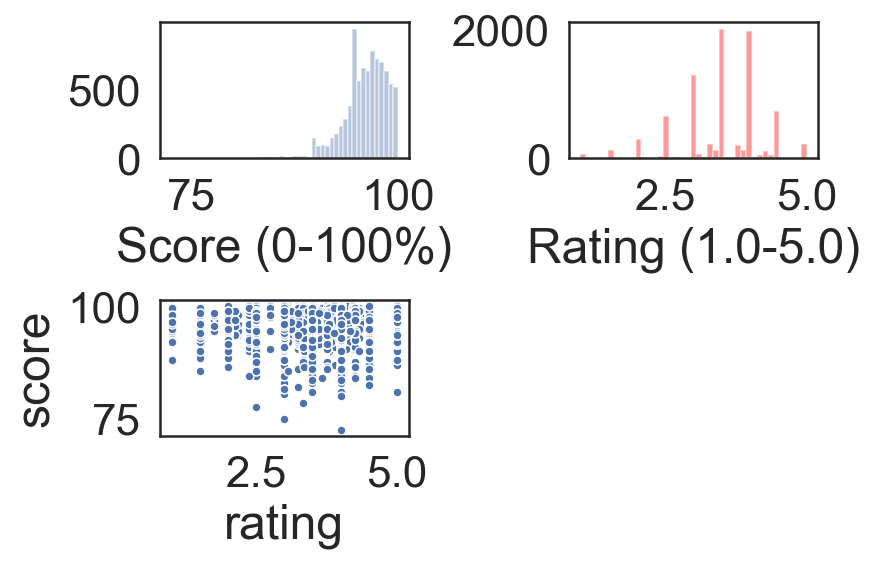

In [13]:
# Looking at relationships between score and rating

print("Fig. 1")
#Variable distribution
plt.subplot(2, 2, 1, autoscale_on = True)
score = pd.Series(df["score"], name = "Score (0-100%)")
sns.distplot(score, norm_hist = False, kde = False)

plt.subplot(2, 2, 2, autoscale_on = True)
rating = pd.Series(df["rating"], name = "Rating (1.0-5.0)")
sns.distplot(rating, color = "red", norm_hist = False, kde = False)

plt.subplot(2, 2, 3, autoscale_on = True)
sns.scatterplot(x = 'rating', y = 'score', data = df, s=20)

plt.tight_layout()

# Linear regression
outcome_1, predictors_1 = patsy.dmatrices('score ~ rating', df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

print()
print()
print("Score mean: " + str(df["score"].mean()))
print("Score median: " + str(df["score"].median()))
print("Score mode: " + str(df["score"].mode()))
print("Rating mean: " + str(df["rating"].mean()))
print("Rating median: " + str(df["rating"].median()))
print("Rating mode: " + str(df["rating"].mode()))

Fig. 1 Visualizing the Relationship between inpection score and yelp rating

One would intuitively believe that a consumer based rating system would have at least a slight correlation to a professional scoring system. However, from the plots generated above, there is no correlation between these systems. The first plot shows the score distribution as a normal distribution skewed to the right. The second plot shows a slightly more normalized distribution. The mean, median, and modes for the score fall between 96 and 97, while the rating's is 3.5. From the third plot, there does not appear to be a correlation between score and rating. This argument is strengthened by the linear regression results with an R-squared value of 0.001. While the yelp scores may not be a good indication of health inspection score, there are other factors that might play a larger role. 

In [14]:
# Distributions

dat = uniform.rvs(size=10000)
#sns.distplot(dat, kde=False, bins=20);

dat = norm.rvs(loc=0, scale=1, size=10000)
#sns.distplot(dat, kde=False, bins=20);

loc1, scale1, size1 = (90, 5, 175)
loc2, scale2, size2 = (70, 5, 175)
bi = np.concatenate([np.random.normal(loc=loc1, scale=scale1, size=size1), 
                     np.random.normal(loc=loc2, scale=scale2, size=size2)])
#sns.distplot(bi, kde=False, bins=20);

r = bernoulli.rvs(0.1 , size=10000)
#sns.distplot(r, kde=False, bins=10);

dat = poisson.rvs(mu=1, size=100000)
#sns.distplot(dat, kde=False);


As you can see there is little correlation between yelp ratings and the inspection scores. The R-squared value is 0.001. 

$$outcome = \beta_0 + \beta_1*predictor$$

$$score = 95.7 + 0.0883*rating$$

Are there better indicators of average restaurant inspection score?

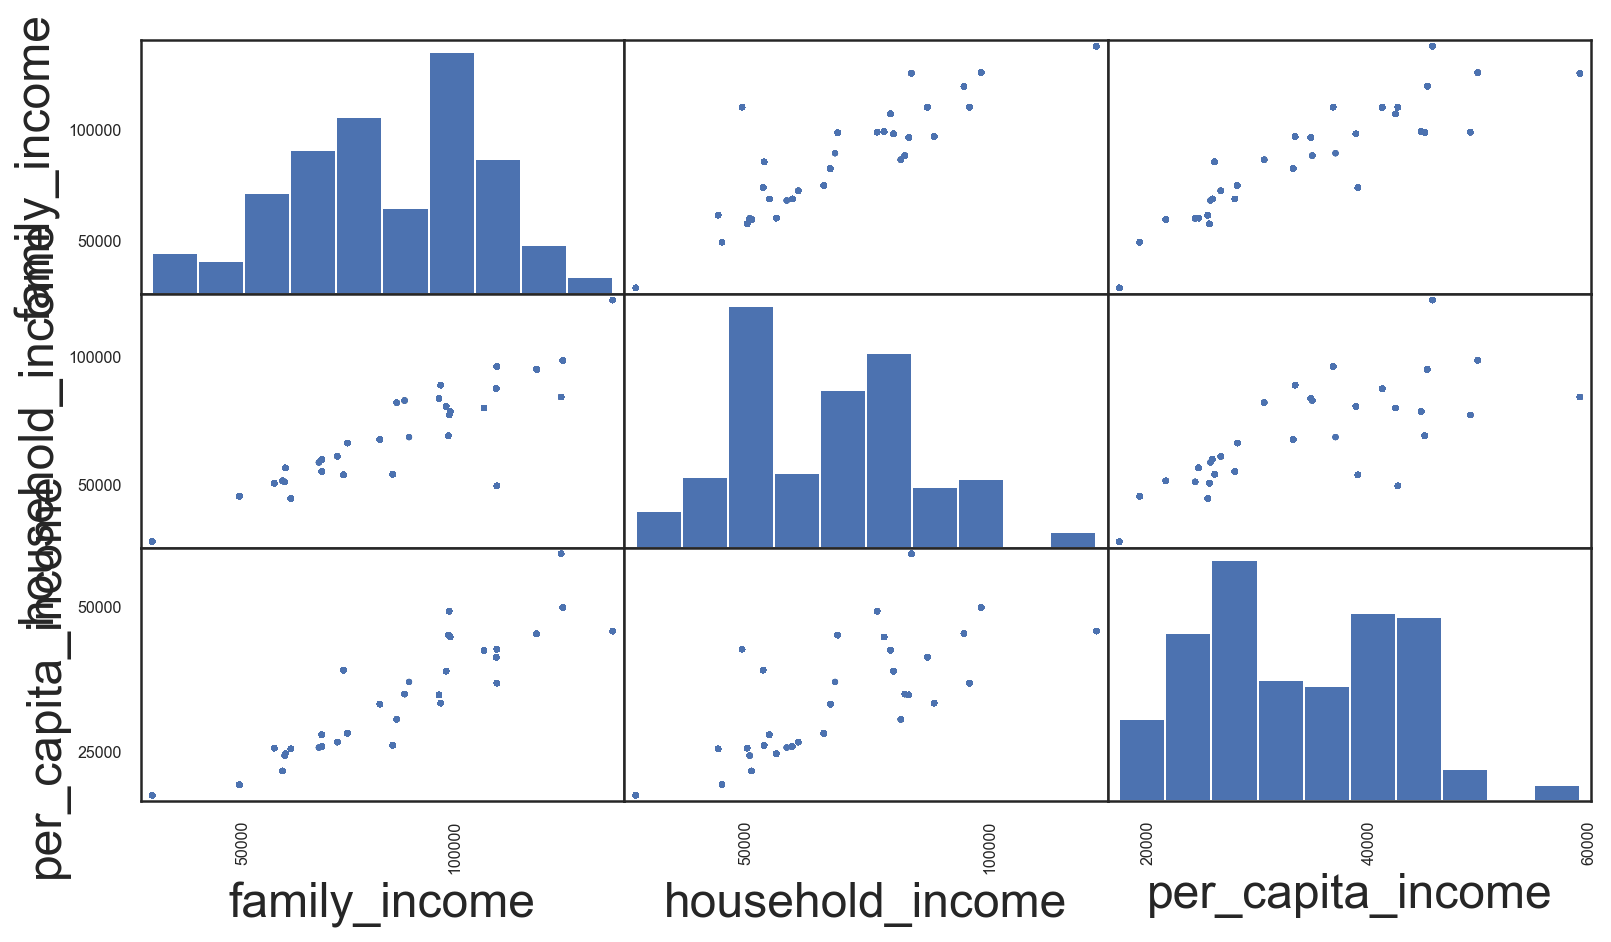

In [15]:
pd.plotting.scatter_matrix(df[['family_income','household_income', 'per_capita_income']], 
                               figsize=(13, 7));

In [16]:
outcome_2, predictors_2 = patsy.dmatrices('family_income ~ household_income', df)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
#print(res_2.summary())

outcome_3, predictors_3 = patsy.dmatrices('family_income ~ per_capita_income', df)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()
#print(res_3.summary())

outcome_4, predictors_4 = patsy.dmatrices('household_income ~ per_capita_income', df)
mod_4 = sm.OLS(outcome_4, predictors_4)
res_4 = mod_4.fit()
#print(res_4.summary())

outcome_5, predictors_5 = patsy.dmatrices('family_income ~ household_income + per_capita_income', df)
mod_5 = sm.OLS(outcome_5, predictors_5)
res_5 = mod_5.fit()
#print(res_5.summary())

outcome_6, predictors_6 = patsy.dmatrices('household_income ~ family_income + per_capita_income', df)
mod_6 = sm.OLS(outcome_6, predictors_6)
res_6 = mod_6.fit()
#print(res_6.summary())

outcome_7, predictors_7 = patsy.dmatrices('per_capita_income ~ family_income + household_income', df)
mod_7 = sm.OLS(outcome_7, predictors_7)
res_7 = mod_7.fit()
print(res_7.summary())

                            OLS Regression Results                            
Dep. Variable:      per_capita_income   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                 1.369e+04
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:45:44   Log-Likelihood:                -83005.
No. Observations:                8461   AIC:                         1.660e+05
Df Residuals:                    8458   BIC:                         1.660e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5595.0930    185.709  

Family income seems to be the best indicator. 

$$family.income = 10.9*10^3 + 1.096*household.income.....R-squared = 0.779$$

$$family.income = 10.2*10^3 + 2.199*per.capita.income.....R-squared = 0.753$$

$$household.income = 17.65*10^3 + 1.462*per.capita.income.....R-squared = 0.513$$

$$family.income = -1.585*10^3 + 0.6659*household.income + 1.226*per.capita.income.....R-squared = 0.893$$

$$household.income = 9*10^3 + 0.851*family.income - 0.409*per.capita.income.....R-squared = 0.789$$

$$per.capita.income = 5.6*10^3 + 0.420*family.income - 0.110*household.income.....R-squared = 0.764$$

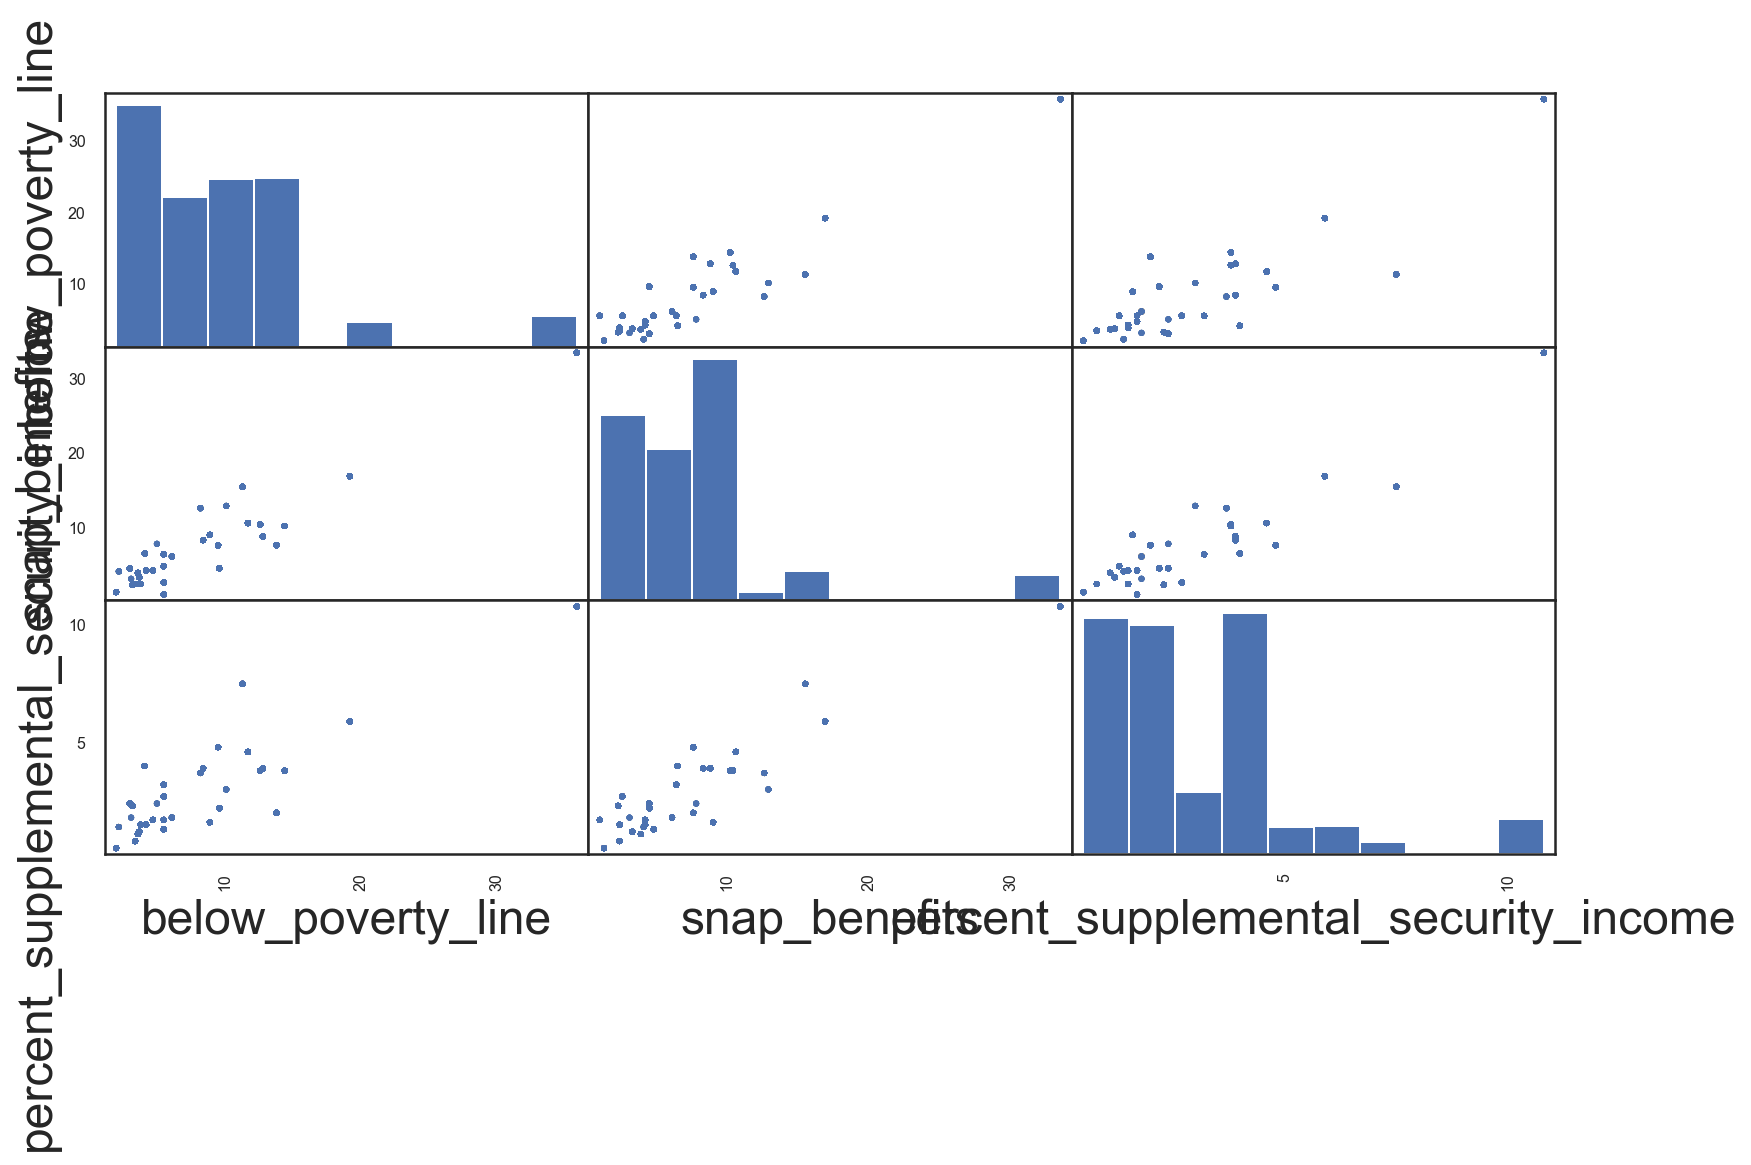

In [17]:
pd.plotting.scatter_matrix(df[['below_poverty_line', 'snap_benefits', 'percent_supplemental_security_income']], 
                               figsize=(13, 7));

In [18]:
outcome_2, predictors_2 = patsy.dmatrices('below_poverty_line ~ snap_benefits', df)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
#print(res_2.summary())

outcome_3, predictors_3 = patsy.dmatrices('below_poverty_line ~ percent_supplemental_security_income', df)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()
#print(res_3.summary())

outcome_4, predictors_4 = patsy.dmatrices('snap_benefits ~ percent_supplemental_security_income', df)
mod_4 = sm.OLS(outcome_4, predictors_4)
res_4 = mod_4.fit()
#print(res_4.summary())

outcome_5, predictors_5 = patsy.dmatrices('below_poverty_line ~ snap_benefits + percent_supplemental_security_income', df)
mod_5 = sm.OLS(outcome_5, predictors_5)
res_5 = mod_5.fit()
#print(res_5.summary())

outcome_6, predictors_6 = patsy.dmatrices('snap_benefits ~ below_poverty_line + percent_supplemental_security_income', df)
mod_6 = sm.OLS(outcome_6, predictors_6)
res_6 = mod_6.fit()
#print(res_6.summary())

outcome_7, predictors_7 = patsy.dmatrices('percent_supplemental_security_income ~ below_poverty_line + snap_benefits', df)
mod_7 = sm.OLS(outcome_7, predictors_7)
res_7 = mod_7.fit()
#print(res_7.summary())

Snap benefits seems to be the best indicator. 

$$below.poverty.line = 1.316 + 1.027*snap.benefits.....R-squared = 0.888$$

$$snap.benefits = -0.933 + 0.522*below.poverty.line + 1.273*security.income.....R-squared = 0.934$$

In [19]:
df.columns

Index(['date', 'address1', 'restaurantopendate', 'days_from_open_date', 'zip',
       'score', 'rating', 'family_income', 'household_income',
       'per_capita_income', 'below_poverty_line', 'snap_benefits',
       'percent_supplemental_security_income', 'nonwhite'],
      dtype='object')

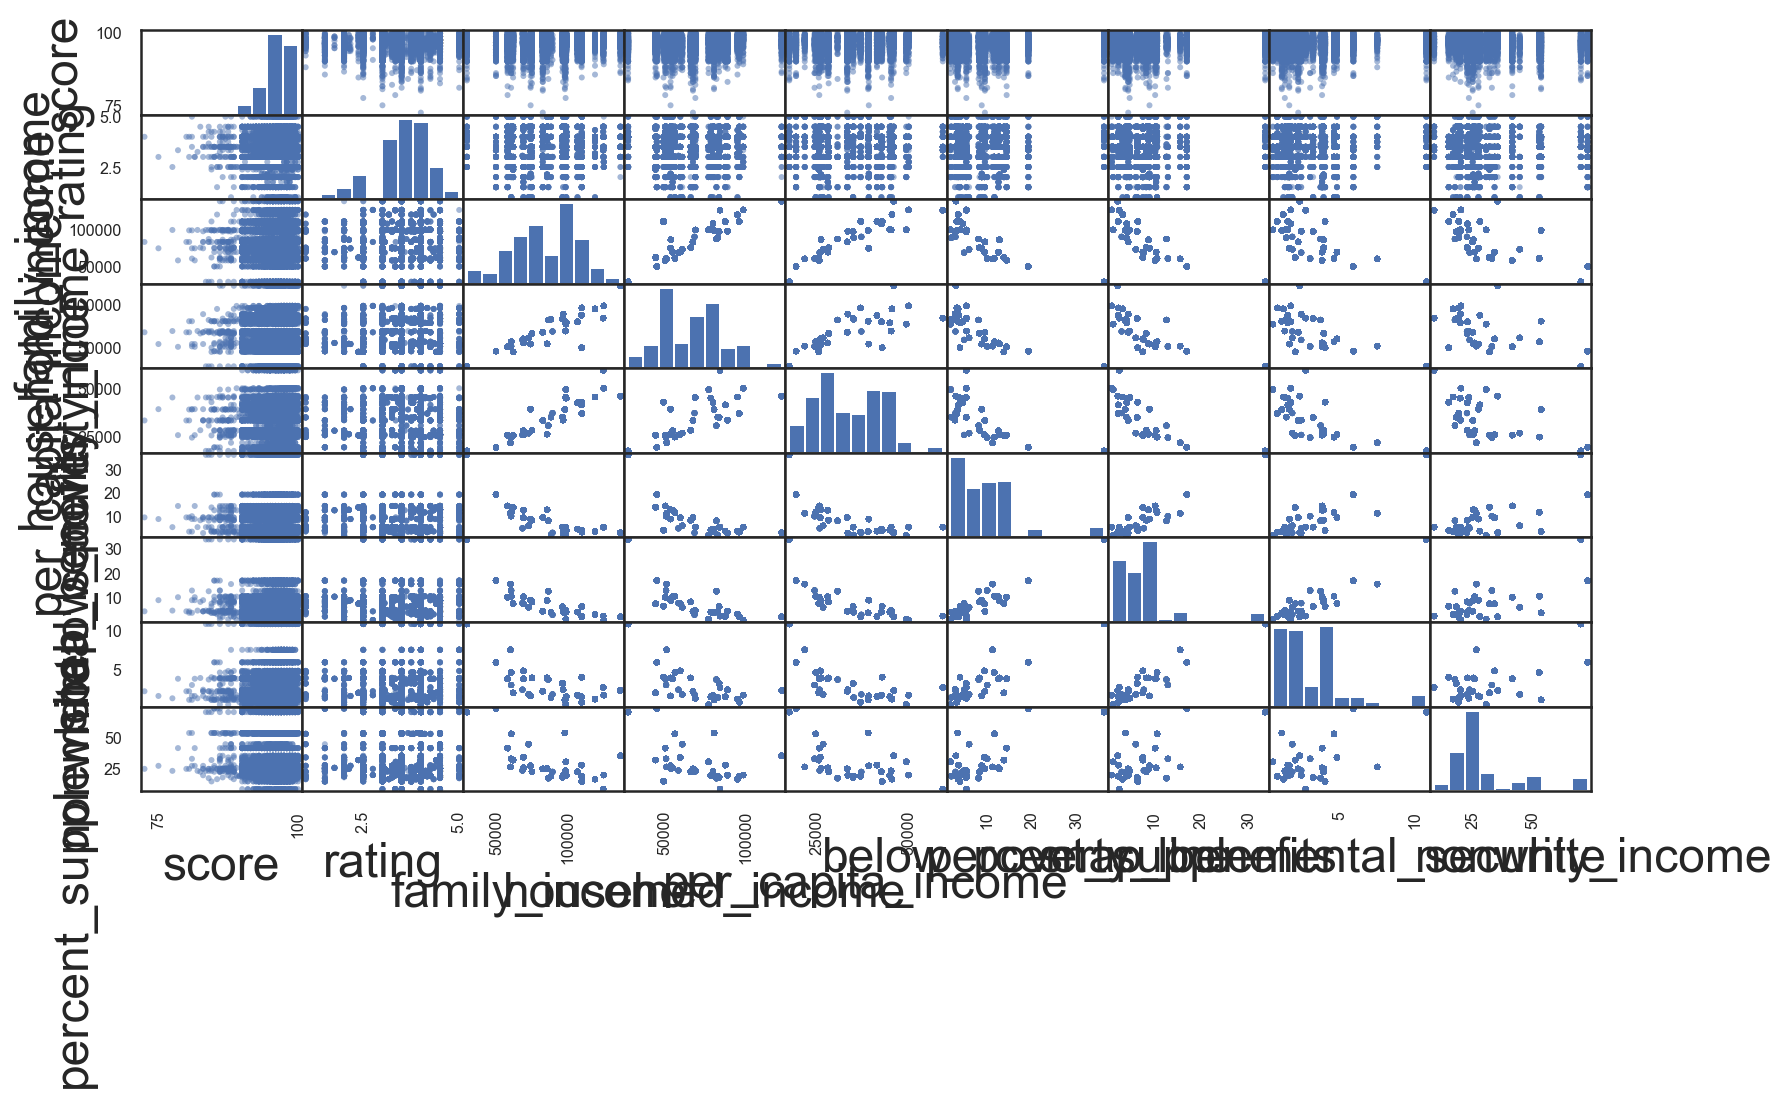

In [20]:
pd.plotting.scatter_matrix(df[['score', 'rating', 'family_income', 'household_income',
       'per_capita_income', 'below_poverty_line', 'snap_benefits',
       'percent_supplemental_security_income', 'nonwhite']], 
                               figsize=(13, 7));

In [21]:
outcome_8, predictors_8 = patsy.dmatrices('score ~ family_income + snap_benefits', df)
mod_8 = sm.OLS(outcome_8, predictors_8)
res_8 = mod_8.fit()
print(res_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.690
Date:                Wed, 10 Jun 2020   Prob (F-statistic):            0.00339
Time:                        17:46:01   Log-Likelihood:                -20311.
No. Observations:                8461   AIC:                         4.063e+04
Df Residuals:                    8458   BIC:                         4.065e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        95.6469      0.237    403.777

In [22]:
#sns.lmplot(x = 'not_distracted', y = 'no_previous', data = df, fit_reg = False);

In [23]:
# Distributions

dat = uniform.rvs(size=10000)
#sns.distplot(dat, kde=False, bins=20);

dat = norm.rvs(loc=0, scale=1, size=10000)
#sns.distplot(dat, kde=False, bins=20);

loc1, scale1, size1 = (90, 5, 175)
loc2, scale2, size2 = (70, 5, 175)
bi = np.concatenate([np.random.normal(loc=loc1, scale=scale1, size=size1), 
                     np.random.normal(loc=loc2, scale=scale2, size=size2)])
#sns.distplot(bi, kde=False, bins=20);

r = bernoulli.rvs(0.1 , size=10000)
#sns.distplot(r, kde=False, bins=10);

dat = poisson.rvs(mu=1, size=100000)
#sns.distplot(dat, kde=False);


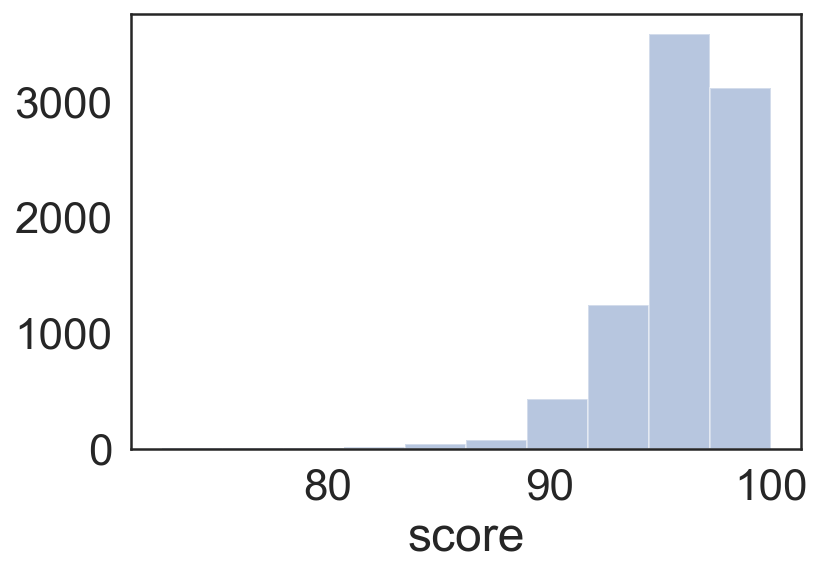

In [24]:
#sns.distplot(df_inspections['zip'], kde=False, bins=10);
sns.distplot(df_inspections['score'], kde=False, bins=10);

# log transformed data
#sns.distplot(np.log10(df_inspections['score'][df_inspections['score'].notnull()]), kde=False, bins=10)
#plt.xlabel('REM Sleep');

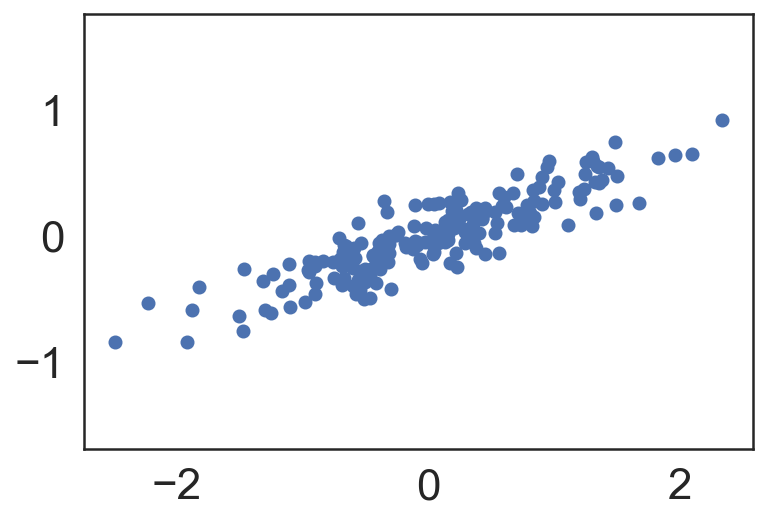

In [25]:

# generate data and look at relationhip
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');


In [26]:
# Use PCA from sklearn
pca = PCA(n_components=2)
pca.fit(X)

print(pca.components_)
print(pca.explained_variance_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


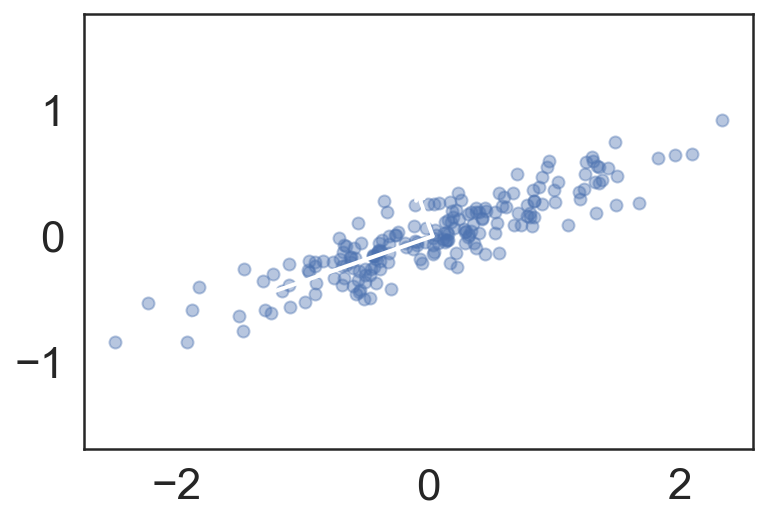

In [27]:
# generate draw_vector function
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->',
                      linewidth=2,
                      shrinkA=0, 
                      shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.4)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

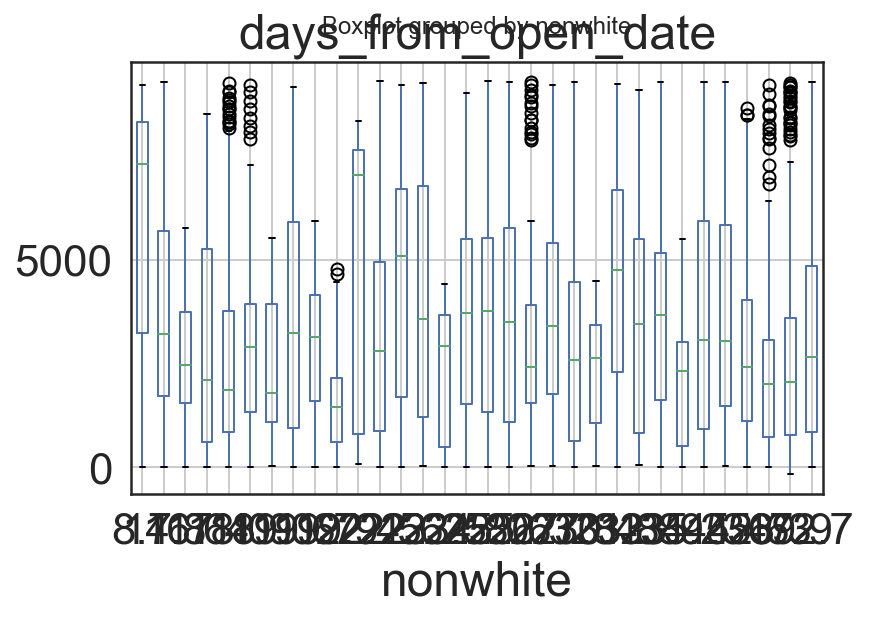

In [28]:
#df.boxplot(column = "rating", by = 'nonwhite');
#df.boxplot(column = "family_income", by = 'nonwhite');
df.boxplot(column = "days_from_open_date", by = 'nonwhite');

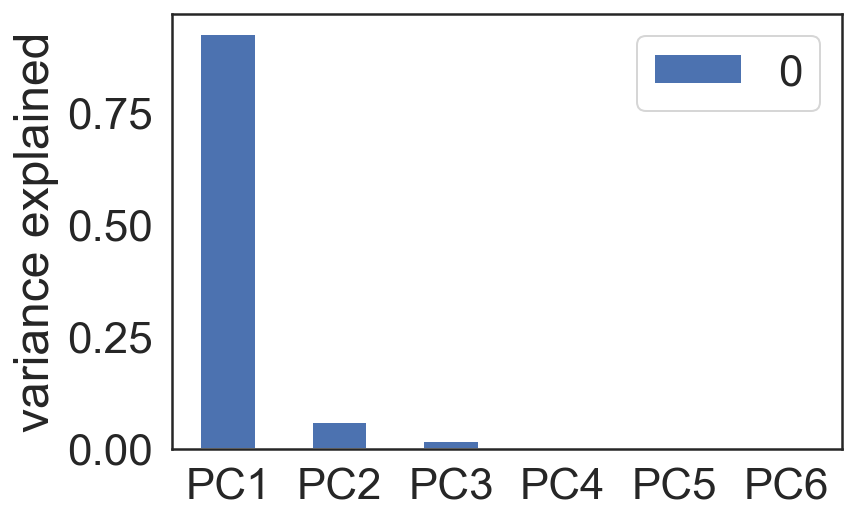

In [29]:

# split data table into predictors and outcome (class labels - species)
predictors = df.iloc[:,7:13].values
#iris_species = df.iloc[:,4].values

# calculate PCs
pca = PCA(n_components = 6)
pca_fit = pca.fit(predictors)
PCs = pca.fit_transform(predictors)

#print(pca_fit.components_)

var_exp = pd.DataFrame(pca_fit.explained_variance_ratio_,
                       ['PC1', 'PC2', 'PC3', 'PC4', "PC5", "PC6"])
var_exp.plot.bar(rot=0)
plt.ylabel('variance explained');

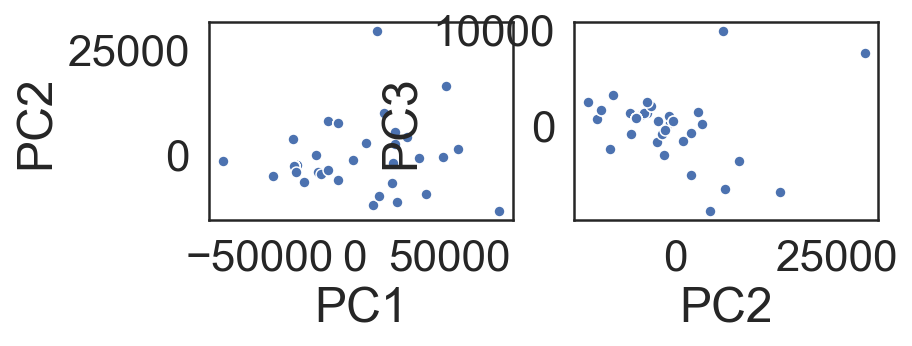

In [30]:
pca_out = pd.DataFrame(PCs, columns=['PC1','PC2','PC3','PC4', "PC5", "PC6"])

plt.subplot(2, 2, 1)
sns.scatterplot(x = 'PC1', y = 'PC2', s = 30, data = pca_out);

plt.subplot(2, 2, 2)
sns.scatterplot(x = 'PC2', y = 'PC3', s = 30, data = pca_out);


# Ethics & Privacy

For this project, only the provided data was used. The restaurant food inspection results are publicly available online. Yelp reviews are also public. The data on the statistics are also publicly known. All the data analyzed was used with proper permission. The purpose of this project is to find relationships between the previously stated data. The findings for this project will not be used for any other purpose other than this course, so there should not be any problems of misuse. There are no forseeable privacy concerns with the datasets because all the data is public. There are potential biases in the dataset. This project is baised against restaurants that do not have online yelp reviews. A possible reason for this is because those types of restaurants may not be as popular or are located in low traffic areas. All the ratings across the yelp reviews were averaged, so restaurants with very little reviews have a higher chance of being inaccurate because the ratings are based on a small sample size. 

Due to the nature of analyzing socioeconomic and ethnic factors, there is a potential for discimination due to these results. This project was carried out without the purpose of targetting groups of people or individual restaurants and is solely for the purpose of understanding correlations between these different factors of inspection scores. If a disparity were to be found, then this study provides evidence as a reason to strive to solve these problems in restaurants. I tried to minimize the effects of these biases and privacy concerns. One way I minimized the bias of the data was by only removing empty rows and exluding data that did not have common addresses and zipcodes in each of the datasets. I minimized privacy concerns by making it clear that these results do not say anything about the nature of the subgroups but rather solely show correlation. 

# Conclusion & Discussion

Discuss your project. Summarize your data and question. Briefly describe your analysis. Summarize your results and conclusions. Be sure to mention any limitations of your project. Discuss the impact of this work on society. (2-3 paragraphs)